In [7]:
import dcraw
import colour
import color_correction
import sys
from other.image_utils import save_image_16
import numpy as np

colour.plotting.colour_style()

colour.utilities.describe_environment()

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit      *
*   (AMD64)]                                                                  *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.1                                                        *
*       colour-demosaicing : 0.2.2                                            *
*       colour-checker-detection : 0.1.3                                      *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.21.0                                                      *
*       matplotlib : 3.5.1              

defaultdict(dict,
            {'Interpreter': {'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'},
             'colour-science.org': {'colour': '0.4.1',
              'colour-demosaicing': '0.2.2',
              'colour-checker-detection': '0.1.3'},
             'Runtime': {'imageio': '2.21.0',
              'matplotlib': '3.5.1',
              'networkx': '2.7.1',
              'numpy': '1.21.5',
              'pandas': '1.4.2',
              'scipy': '1.7.3',
              'sklearn': '1.0.2',
              'tqdm': '4.64.0',
              'opencv': '4.6.0'}})

In [8]:
path = "C:/Users/ecoplants/Desktop/"
infn = "DSCF5420.RAF"
outfn = sys.path[0] + "/" + infn.split(".", 1)[0]
suffix = ".RAF"
verbose = True

In [9]:
if 1:
    rawData = dcraw.imread(infn, path = path)

    image_srgb = dcraw.postprocessing(rawData, cam_model = "GFX100S", demosacing_method = 2, verbose = verbose)

    # image_bright = dcraw_utils.auto_bright(image_srgb, perc=0.005, verbose=verbose)

    save_image_16(outfn + "test.tiff", image_srgb, verbose = verbose)
    # image_utils.save_image_16(outfn + "_bright.tiff", image_bright, verbose = verbose)


Overwrite image data with GFX100S.
Start white balance correction with camera setting.
WB coefficient is [ 0.98880597  0.56343284  1.          0.56343284]
Scale coefficient is [ 0.99266849  0.56563375  1.00390625  0.56563375]
White balance finished.

Start demosaicing.
Demosacing using [<function demosaicing_CFA_Bayer_Menon2007 at 0x000002797DBE9A60>]...
Demosacing finished.

Dcraw finished.
Write file to disk [d:\Dev\Personal\dcraw_py/DSCF5420test.tiff]


Auto bright ratio: 21.65940570457241


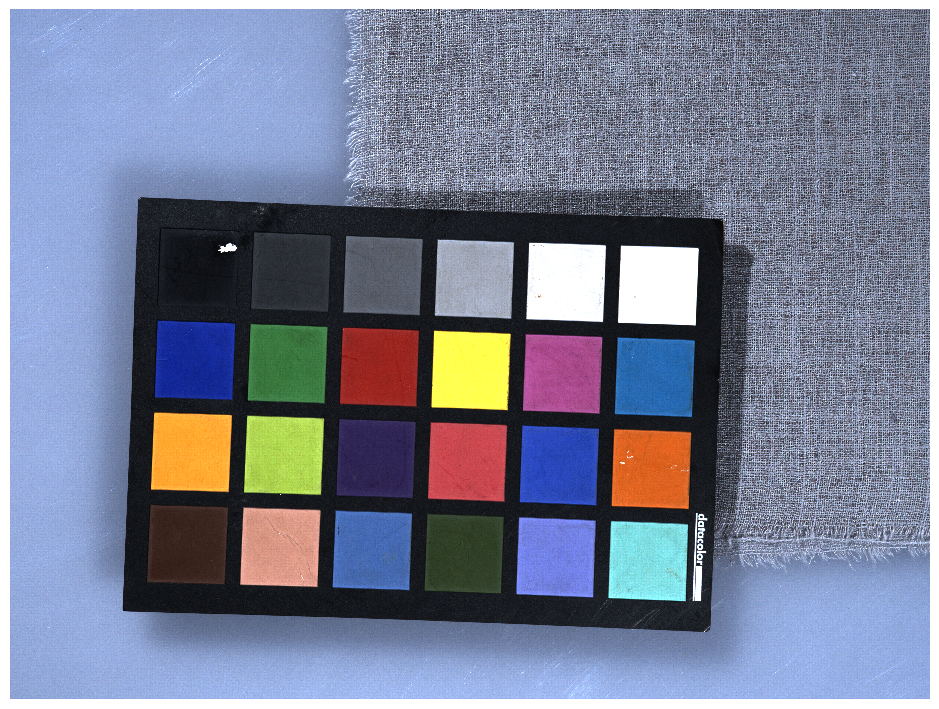

(<Figure size 1280x720 with 1 Axes>, <AxesSubplot:>)

In [10]:
image_lrgb = image_srgb / 65535

image_lrgb, ratio = color_correction.auto_bright(image_lrgb, dst_avg = 0.50, verbose=verbose)

# image_lrgb = colour.cctf_decoding(colour.io.read_image("cctest_images/spyderchecker_shift.jpg"))

colour.plotting.plot_image(image_lrgb)

In [14]:
swatch = color_correction.getColorCorrectionSwatches(image_lrgb, auto_shink = False, verbose = verbose)

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


In [13]:
# image_corrected = color_correction.correction(image_lrgb, swatch, checker = colour.COLOURCHECKERS['ColorChecker 2005'], verbose = verbose)
image_corrected = color_correction.correction(image_lrgb, swatch, verbose = verbose)

ValueError: einstein sum subscripts string contains too many subscripts for operand 1

In [ ]:
image_corrected[image_corrected>1] = 1
image_corrected[image_corrected<0] = 0

image_corrected = colour.cctf_encoding(image_corrected) * 65535

save_image_16(outfn + "_corrected.tiff", image_corrected, verbose = verbose)

In [ ]:
import dcraw
import colour
import color_correction
import sys
from other.image_utils import save_image_16
import numpy as np

colour.plotting.colour_style()

colour.utilities.describe_environment()

path = sys.path[0] + "/images/"
infn = "DSCF0145.RAF"
outfn = path + infn.split(".", 1)[0]
suffix = ".RAF"
verbose = True

if 1:
    rawData = dcraw.imread(infn, path = path)

    # image_srgb = dcraw.postprocessing(rawData, use_rawpy_postprocessing = True, cam_model = "GFX100S", verbose = verbose)
    # save_image_16(outfn + "_rawpy.tiff", image_srgb, verbose = verbose)
    # image_srgb = dcraw.postprocessing(rawData, cam_model = "GFX100S", demosacing_method = 0, verbose = verbose)
    # save_image_16(outfn + "_0.tiff", image_srgb, verbose = verbose)

    # image_srgb = dcraw.postprocessing(rawData, cam_model = "GFX100S", demosacing_method = 1, verbose = verbose)
    # save_image_16(outfn + "_11.tiff", image_srgb, verbose = verbose)

    save_image_16("ref.tiff", rawData.raw_image_visible, verbose = verbose)

    